In [1]:
import platform
import os
import numpy as np
import tensorflow as tf
import keras
from keras import layers

gpu_token = tf.test.is_gpu_available('GPU')

if platform.machine() == 'x86_64':
    if gpu_token:
        os.chdir('/home/ucdasec/Faulthunter-RNN-approach')
    else:
        os.chdir("/home/sakshmeno/Documents/GitHub/C-RNN-approach")
elif platform.machine() == 'arm64':
    os.chdir("/Users/saksh.menon/Documents/GitHub/C-RNN-approach")

from Utils.dataframe_gen import *
from Utils.OneHot_gen import *
from Utils.TFIDF_gen import *
from Utils.word2vec_gen import *
from Utils.vector_gen import *
from Utils.metrics_summary import *

from Models.RNN_paper_prototype import *


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2024-03-16 23:16:12.808731: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-16 23:16:12.808746: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-16 23:16:12.808751: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-16 23:16:12.808777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-16 23:16:12.808791: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [2]:
original_df = dataframe_init(gpu_token)
vectors = vec_split(original_df)
word2vec_init(original_df, vectors, gpu_token)
tensors = tensor_gen(vectors)

2024-03-16 23:16:14.901208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-16 23:16:14.901226: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-03-16 23:16:14.993233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [3]:
model = model_ver_1_(vectors[0]['Encoded Lines'][0].shape[0])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 218, 1024)         1050624   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 218, 1024)         2098176   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1024)              2098176   
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [4]:
history = model.fit(tensors[0], tensors[2], epochs=20)
y_pred = model.predict(tensors[1])

Epoch 1/20
 14/131 [==>...........................] - ETA: 3:57 - loss: 0.2670 - accuracy: 0.9464

KeyboardInterrupt: 

In [5]:
classify = lambda x : int(x[0]<x[1])
classified_outputs = list(map(classify, y_pred))
classified_labels = list(map(classify, tensors[3]))

In [6]:
score_summary(classified_labels, classified_outputs, 0)
score_summary(classified_labels, classified_outputs, 1)


For secure:
f1 score:  0.9903100775193798
precision score:  0.980806142034549
recall score:  0

For insecure:
f1 score:  0.0
precision score:  0
recall score:  0.0



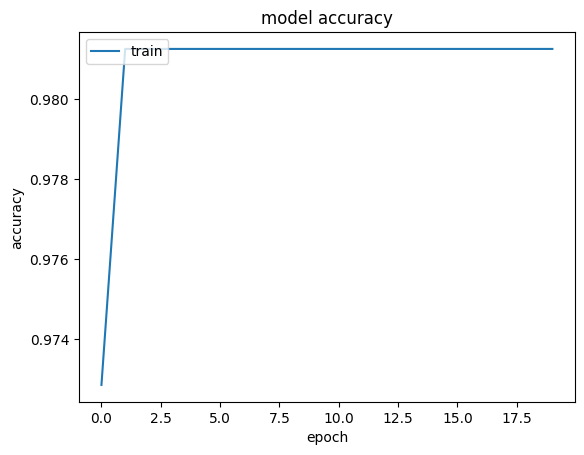

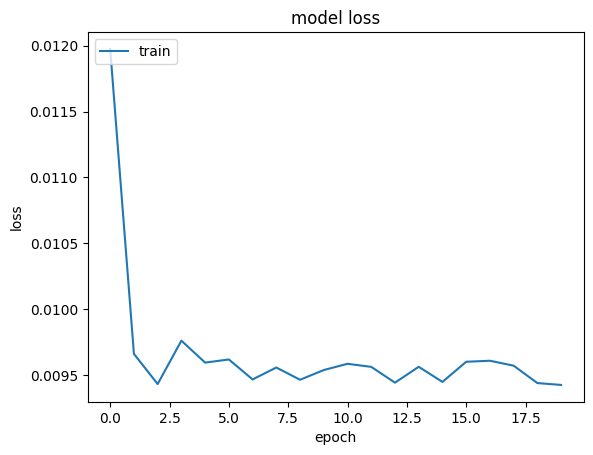

In [7]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
!nvidia-smi

Sat Mar 16 19:52:08 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.147.05   Driver Version: 525.147.05   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:02:00.0 Off |                  N/A |
| 27%   33C    P8     5W / 151W |   7694MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
!git pull

remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 4), reused 6 (delta 4), pack-reused 0
Unpacking objects: 100% (6/6), 8.57 KiB | 175.00 KiB/s, done.
From https://github.com/sakshmenon/Faulthunter-RNN-approach
   01b0d5a..7a1e371  dev        -> origin/dev
Updating 01b0d5a..7a1e371
Fast-forward
 Models/RNN_paper_prototype.py |   2 +-
 Scripts/tester.ipynb          | 684 ++++++++++--------------------------------
 2 files changed, 155 insertions(+), 531 deletions(-)
